<a href="https://colab.research.google.com/github/MehrdadJalali-AI/Spectrum/blob/main/PlotExperementalFilled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

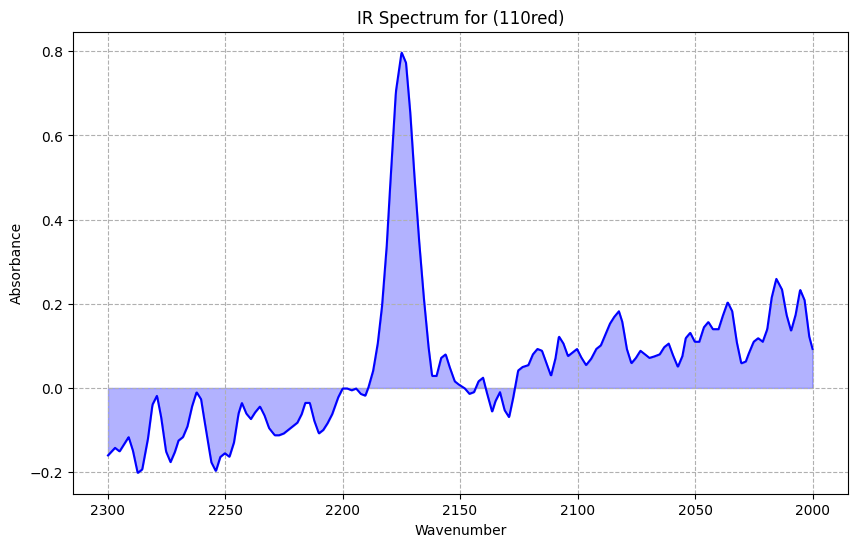

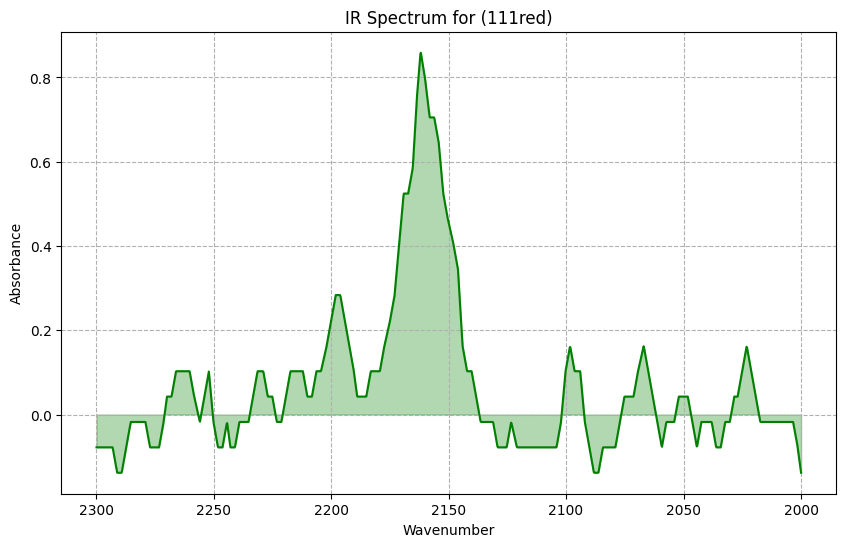

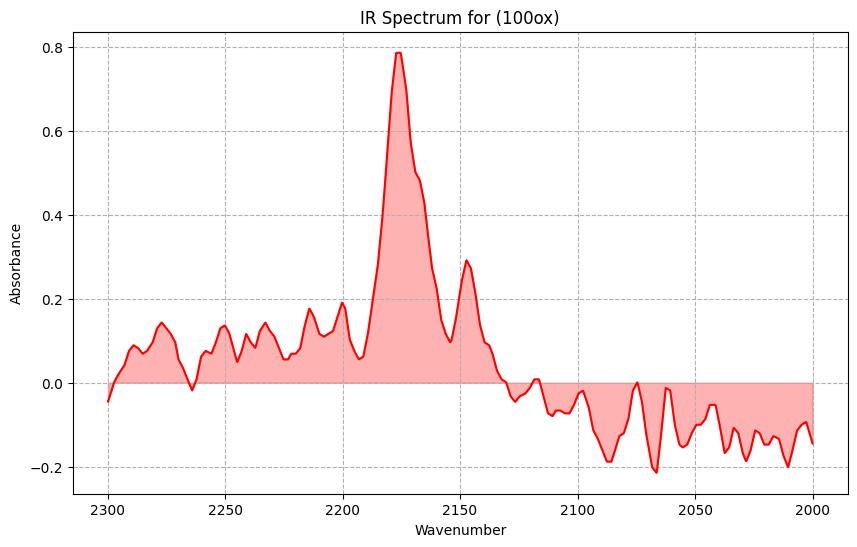

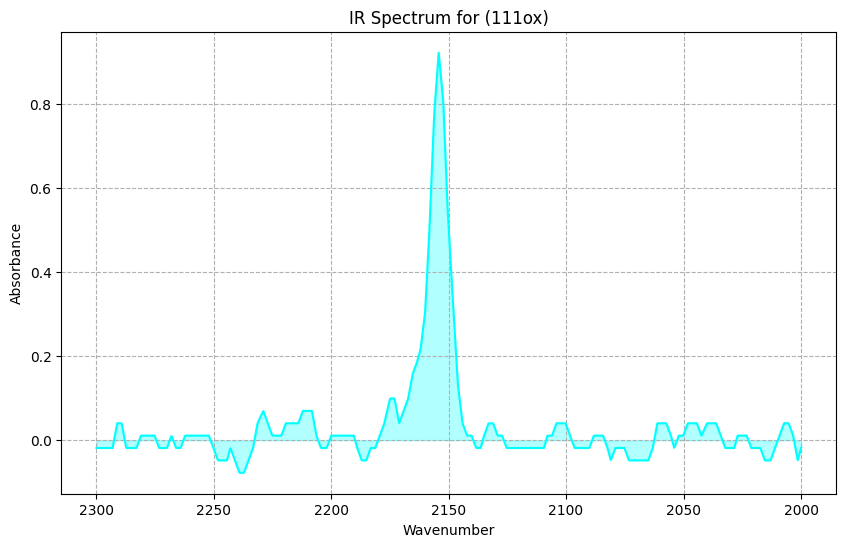

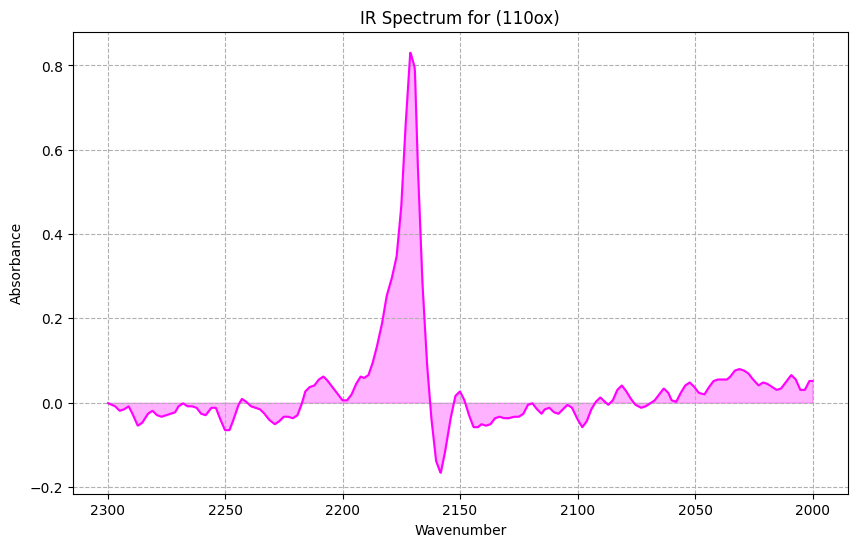

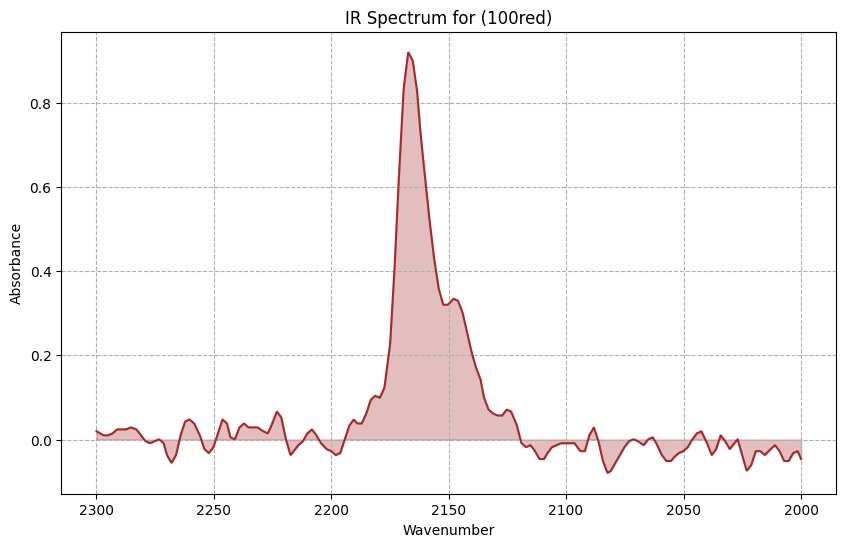

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

# Define specific frequencies and corresponding classes/labels
specificFrequencies = {
    2175: 'CeO2(110)red',
    2170: 'CeO2(110)ox',
    2176: 'CeO2(100)ox',
    2168: 'CeO2(100)red',
    2162: 'CeO2(111)red',
    2154: 'CeO2(111)ox'
}

# Folder containing CSV files
folder_path = '/content/drive/MyDrive/Research/Spectroscopy/IR_Spectrum_Predcition/ExperimentalData/'

# Define a list of colors to cycle through
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'brown']

# Iterate over each file in the folder
for index, filename in enumerate(os.listdir(folder_path)):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        data = pd.read_csv(file_path, header=None, names=["Wavenumber", "Absorbance"])
        file_name = os.path.splitext(os.path.basename(file_path))[0]  # Extracts the file name without extension

        # Assuming spectrum_min and spectrum_max are defined earlier
        spectrum_min, spectrum_max = 2000.0, 2300.0

        data['Wavenumber'] = pd.to_numeric(data['Wavenumber'], errors='coerce')
        data['Absorbance'] = pd.to_numeric(data['Absorbance'], errors='coerce')

        # Filter data within the specified wavenumber range
        filtered_data = data[(data['Wavenumber'] >= spectrum_min) & (data['Wavenumber'] <= spectrum_max)].copy()
        filtered_data = filtered_data.dropna(subset=['Absorbance'])

        # Preprocess the filtered data
        filtered_data['Absorbance'] *= -1
        min_value = np.min(filtered_data['Absorbance'])
        max_value = np.max(filtered_data['Absorbance'])
        spectraData_normalized = (filtered_data['Absorbance'] - min_value) / (max_value - min_value)
        filtered_data['Absorbance'] = spectraData_normalized

        # Calculating background value and subtracting it using spectrum_min and spectrum_max
        background_data1 = filtered_data[(filtered_data['Wavenumber'] >= spectrum_min) & (filtered_data['Wavenumber'] <= 2140)]
        background_data2 = filtered_data[(filtered_data['Wavenumber'] >= 2200) & (filtered_data['Wavenumber'] <= spectrum_max)]

        background_value1 = background_data1['Absorbance'].mean()
        background_value2 = background_data2['Absorbance'].mean()

        # Using the average of these two values as the overall background value
        background_value = np.mean([background_value1, background_value2])

        filtered_data['Absorbance'] -= background_value

        # Prepare data for interpolation
        x = filtered_data['Wavenumber']
        y = filtered_data['Absorbance']

        # Normalize x-values for interpolation between 0 and 1
        x_normalized = (x - spectrum_min) / (spectrum_max - spectrum_min)

        # Create an interpolation function
        f = interp1d(x_normalized, y, kind='linear', fill_value="extrapolate")

        # Define the new x-range for interpolation
        new_x = np.linspace(0, 1, 1500)  # Adjust the number of points as needed

        # Compute the interpolated y-values
        interpolated_absorbance = f(new_x)

        # Plot each spectrum in a separate plot with a different color
        plt.figure(figsize=(10, 6))
        plt.plot(np.arange(2000, 2299.8, 0.2), interpolated_absorbance, color=colors[index % len(colors)])
        plt.fill_between(np.arange(2000, 2299.8, 0.2), interpolated_absorbance, color=colors[index % len(colors)], alpha=0.3)
        plt.title(f'IR Spectrum for ({file_name})')
        plt.xlabel('Wavenumber')
        plt.ylabel('Absorbance')
        plt.gca().invert_xaxis()
        plt.grid(True, which="both", ls="--")
        plt.show()


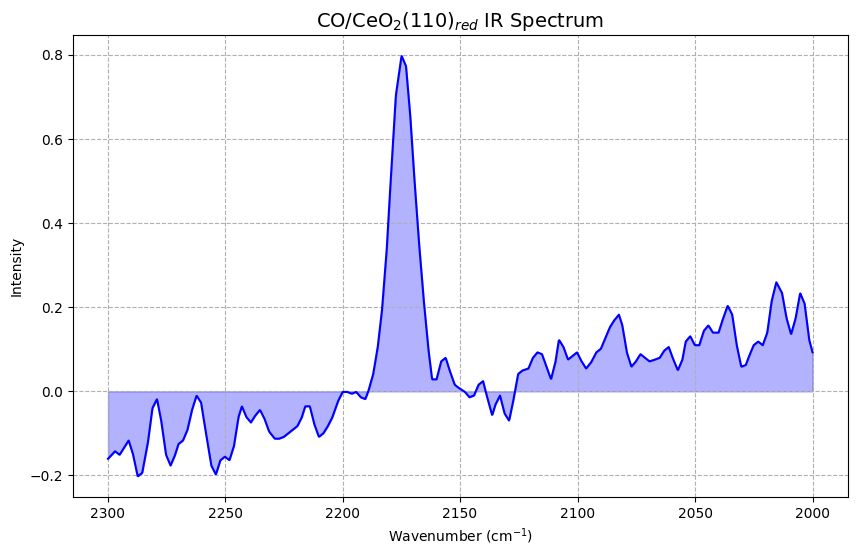

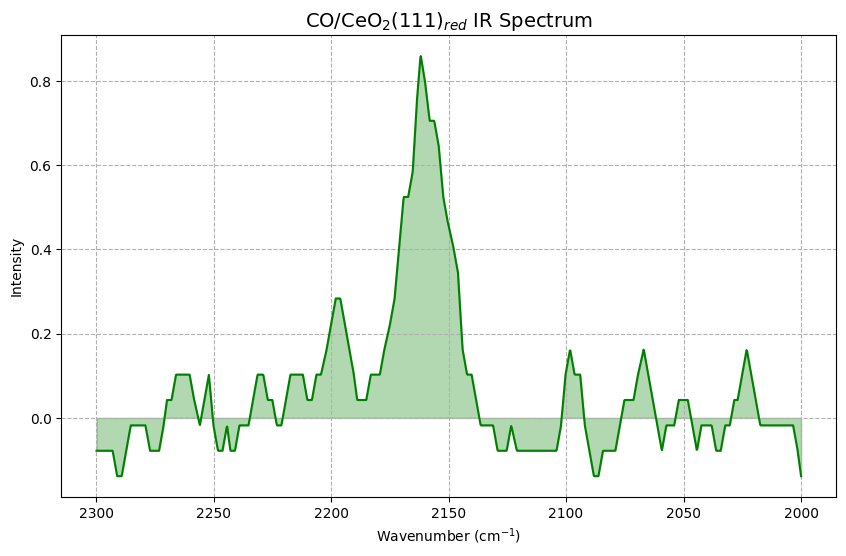

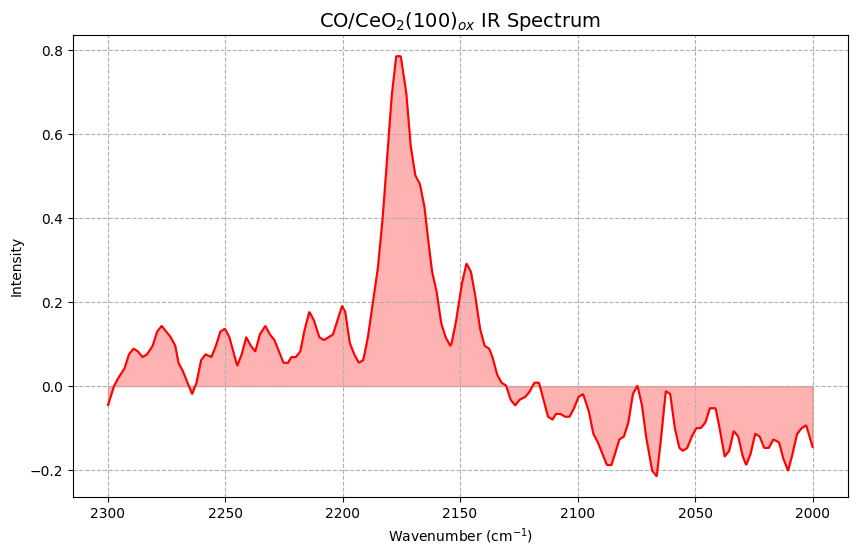

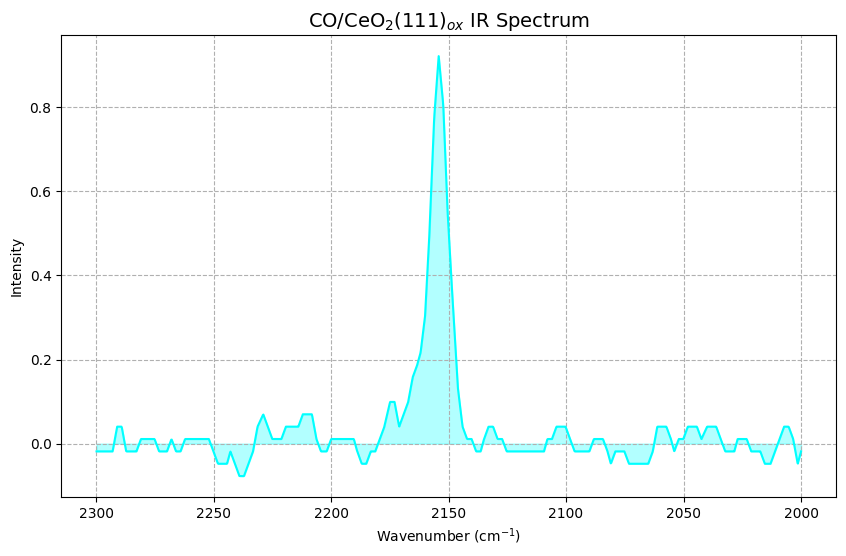

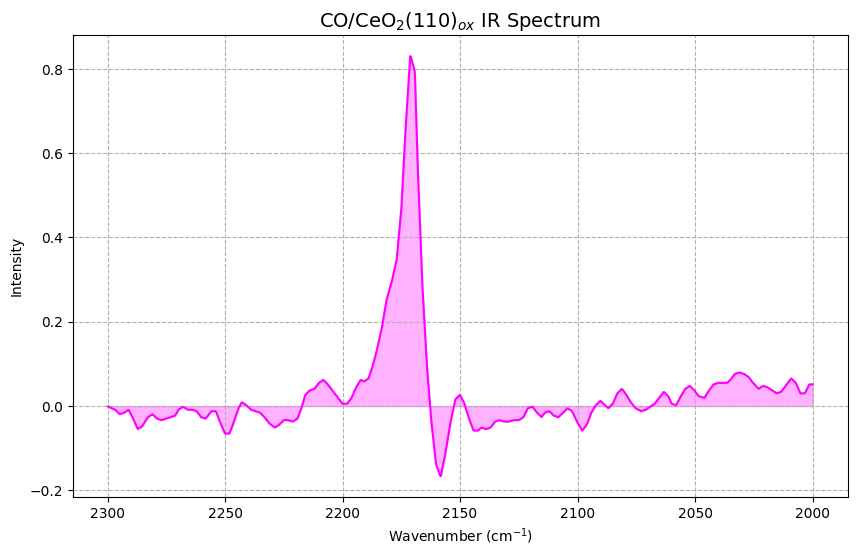

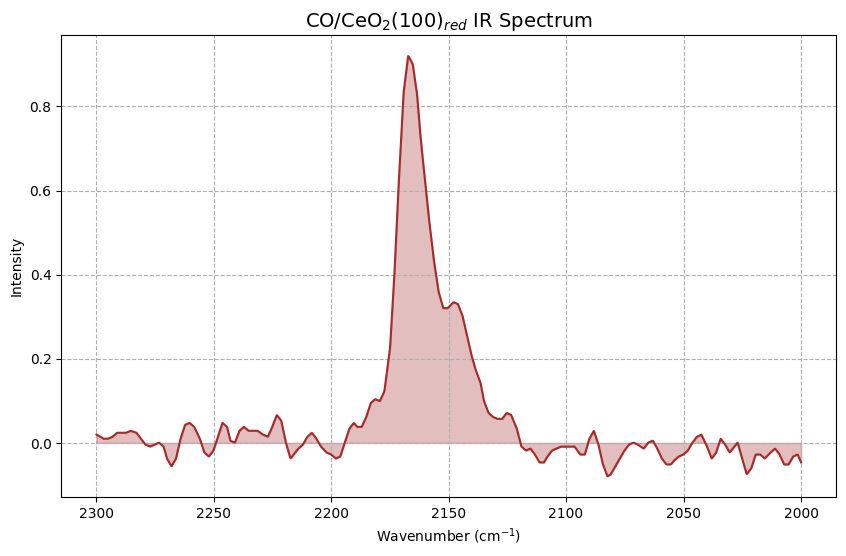

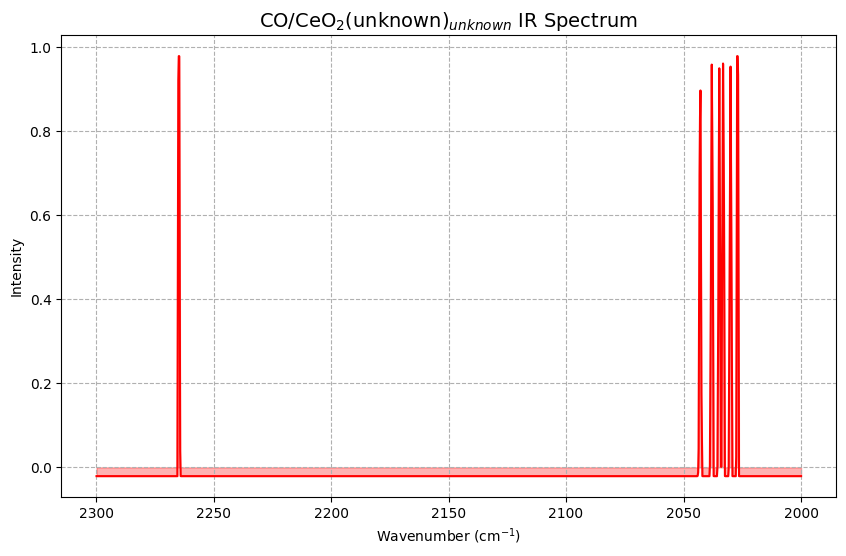

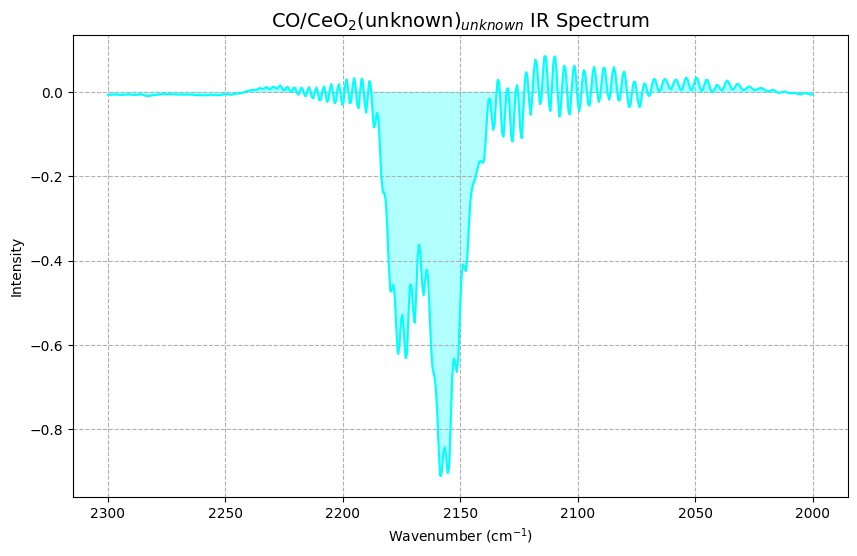

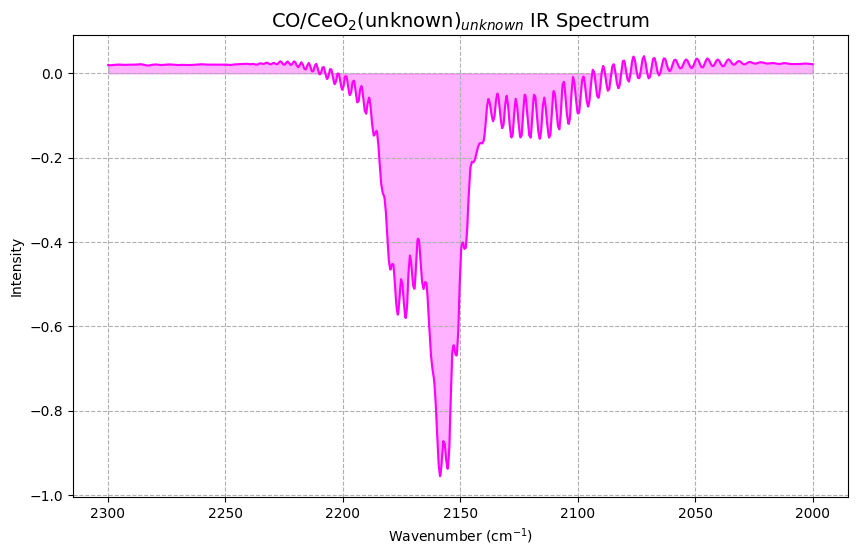

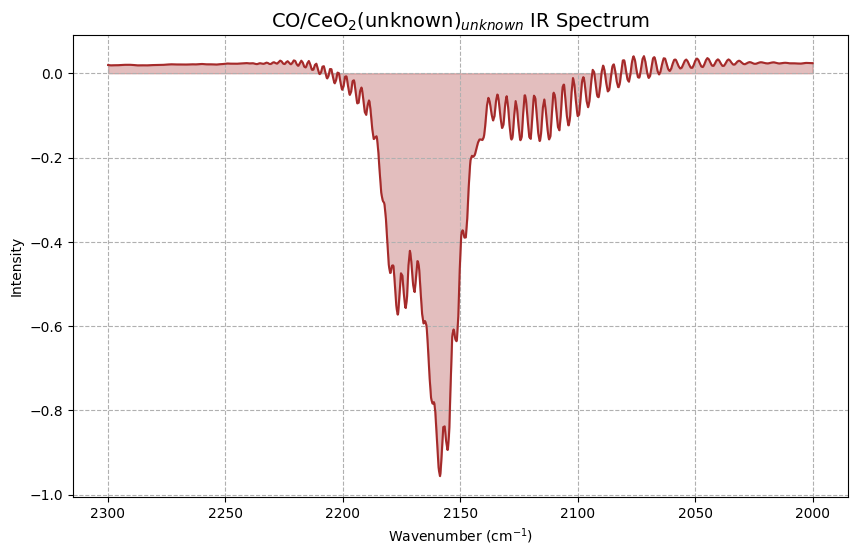

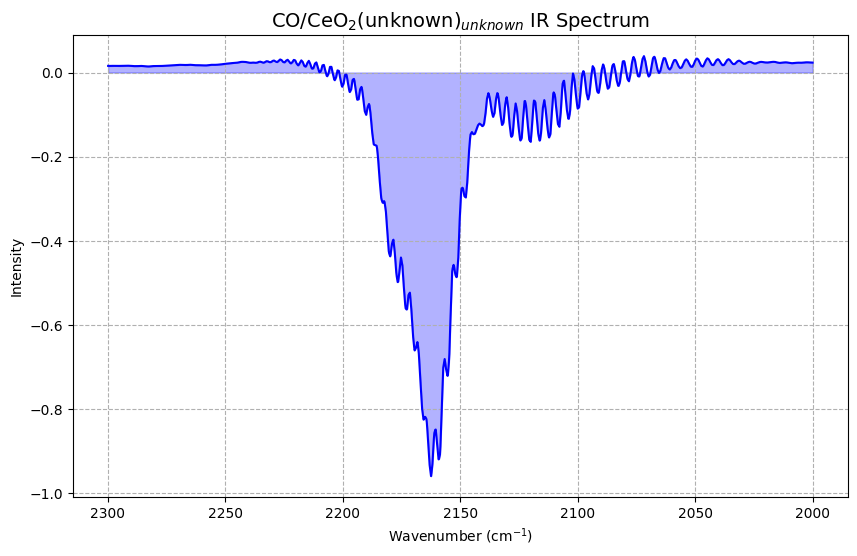

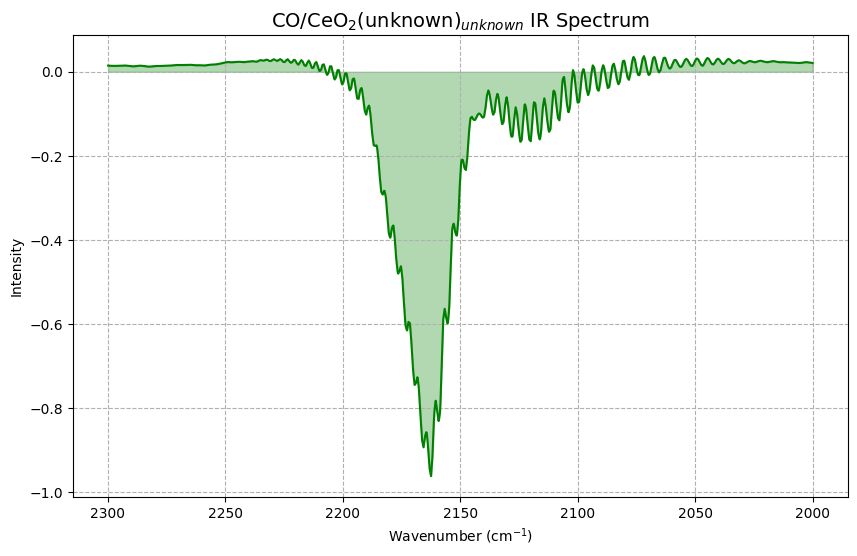

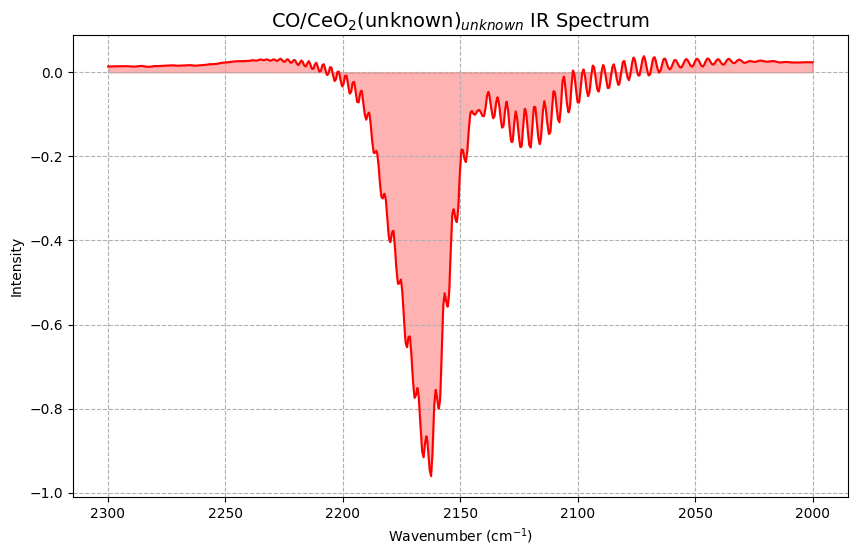

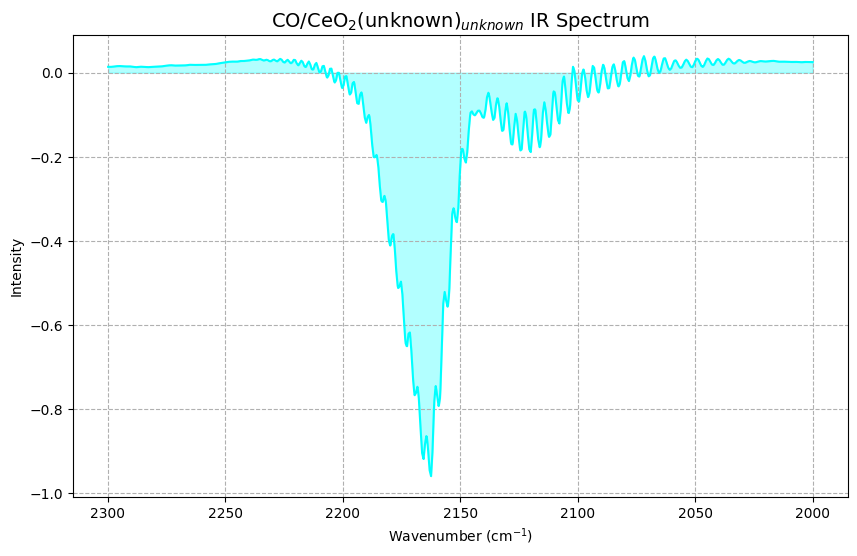

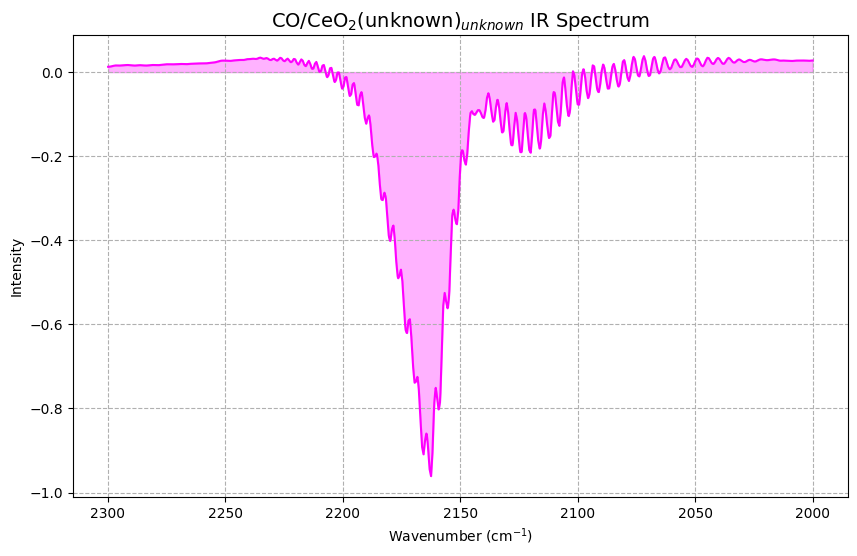

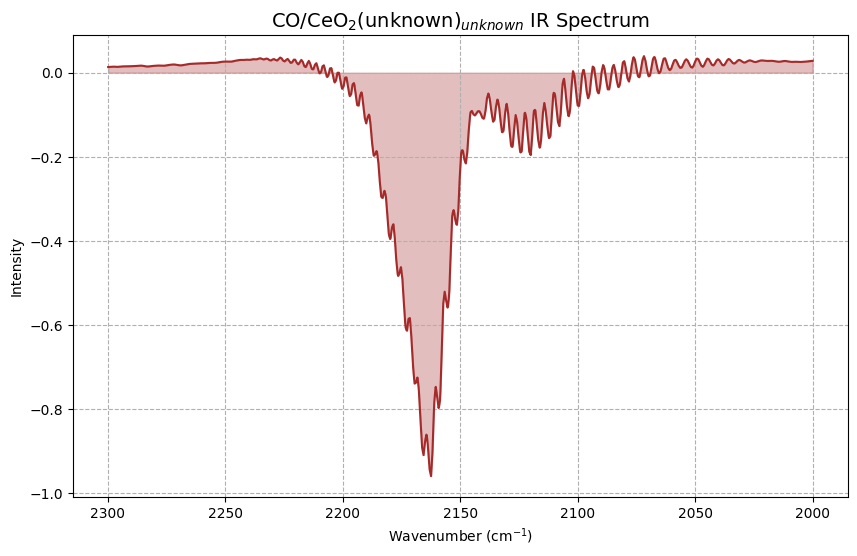

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

# Folder containing CSV files
folder_path = '/content/drive/MyDrive/Research/Spectroscopy/IR_Spectrum_Predcition/ExperimentalData/'

# Define a list of colors to cycle through
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'brown']

# Iterate over each file in the folder
for index, filename in enumerate(os.listdir(folder_path)):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        data = pd.read_csv(file_path, header=None, names=["Wavenumber", "Absorbance"])
        file_name = os.path.splitext(os.path.basename(file_path))[0]  # Extracts the file name without extension


        # Extract xxx and yy from the file name
        if 'red' in file_name:
            xxx = file_name.replace('red', '')
            yy = 'red'
        elif 'ox' in file_name:
            xxx = file_name.replace('ox', '')
            yy = 'ox'
        else:
            xxx = 'unknown'
            yy = 'unknown'



        # Assuming spectrum_min and spectrum_max are defined earlier
        spectrum_min, spectrum_max = 2000.0, 2300.0

        data['Wavenumber'] = pd.to_numeric(data['Wavenumber'], errors='coerce')
        data['Absorbance'] = pd.to_numeric(data['Absorbance'], errors='coerce')

        # Filter data within the specified wavenumber range
        filtered_data = data[(data['Wavenumber'] >= spectrum_min) & (data['Wavenumber'] <= spectrum_max)].copy()
        filtered_data = filtered_data.dropna(subset=['Absorbance'])

        # Preprocess the filtered data
        filtered_data['Absorbance'] *= -1
        min_value = np.min(filtered_data['Absorbance'])
        max_value = np.max(filtered_data['Absorbance'])
        spectraData_normalized = (filtered_data['Absorbance'] - min_value) / (max_value - min_value)
        filtered_data['Absorbance'] = spectraData_normalized

        # Calculating background value and subtracting it using spectrum_min and spectrum_max
        background_data1 = filtered_data[(filtered_data['Wavenumber'] >= spectrum_min) & (filtered_data['Wavenumber'] <= 2140)]
        background_data2 = filtered_data[(filtered_data['Wavenumber'] >= 2200) & (filtered_data['Wavenumber'] <= spectrum_max)]

        background_value1 = background_data1['Absorbance'].mean()
        background_value2 = background_data2['Absorbance'].mean()

        # Using the average of these two values as the overall background value
        background_value = np.mean([background_value1, background_value2])

        filtered_data['Absorbance'] -= background_value

        # Prepare data for interpolation
        x = filtered_data['Wavenumber']
        y = filtered_data['Absorbance']

        # Normalize x-values for interpolation between 0 and 1
        x_normalized = (x - spectrum_min) / (spectrum_max - spectrum_min)

        # Create an interpolation function
        f = interp1d(x_normalized, y, kind='linear', fill_value="extrapolate")

        # Define the new x-range for interpolation
        new_x = np.linspace(0, 1, 1500)  # Adjust the number of points as needed

        # Compute the interpolated y-values
        interpolated_absorbance = f(new_x)

        # Plot each spectrum in a separate plot with a different color
        plt.figure(figsize=(10, 6))
        plt.plot(np.arange(2000, 2299.8, 0.2), interpolated_absorbance, color=colors[index % len(colors)])
        plt.fill_between(np.arange(2000, 2299.8, 0.2), interpolated_absorbance, color=colors[index % len(colors)], alpha=0.3)
        plt.title(f'CO/CeO$_{{2}}$({xxx})$_{{{yy}}}$ IR Spectrum', fontsize=14)
        plt.xlabel('Wavenumber (cm$^{-1}$)')
        plt.ylabel('Intensity')
        plt.gca().invert_xaxis()
        plt.grid(True, which="both", ls="--")
        plt.show()


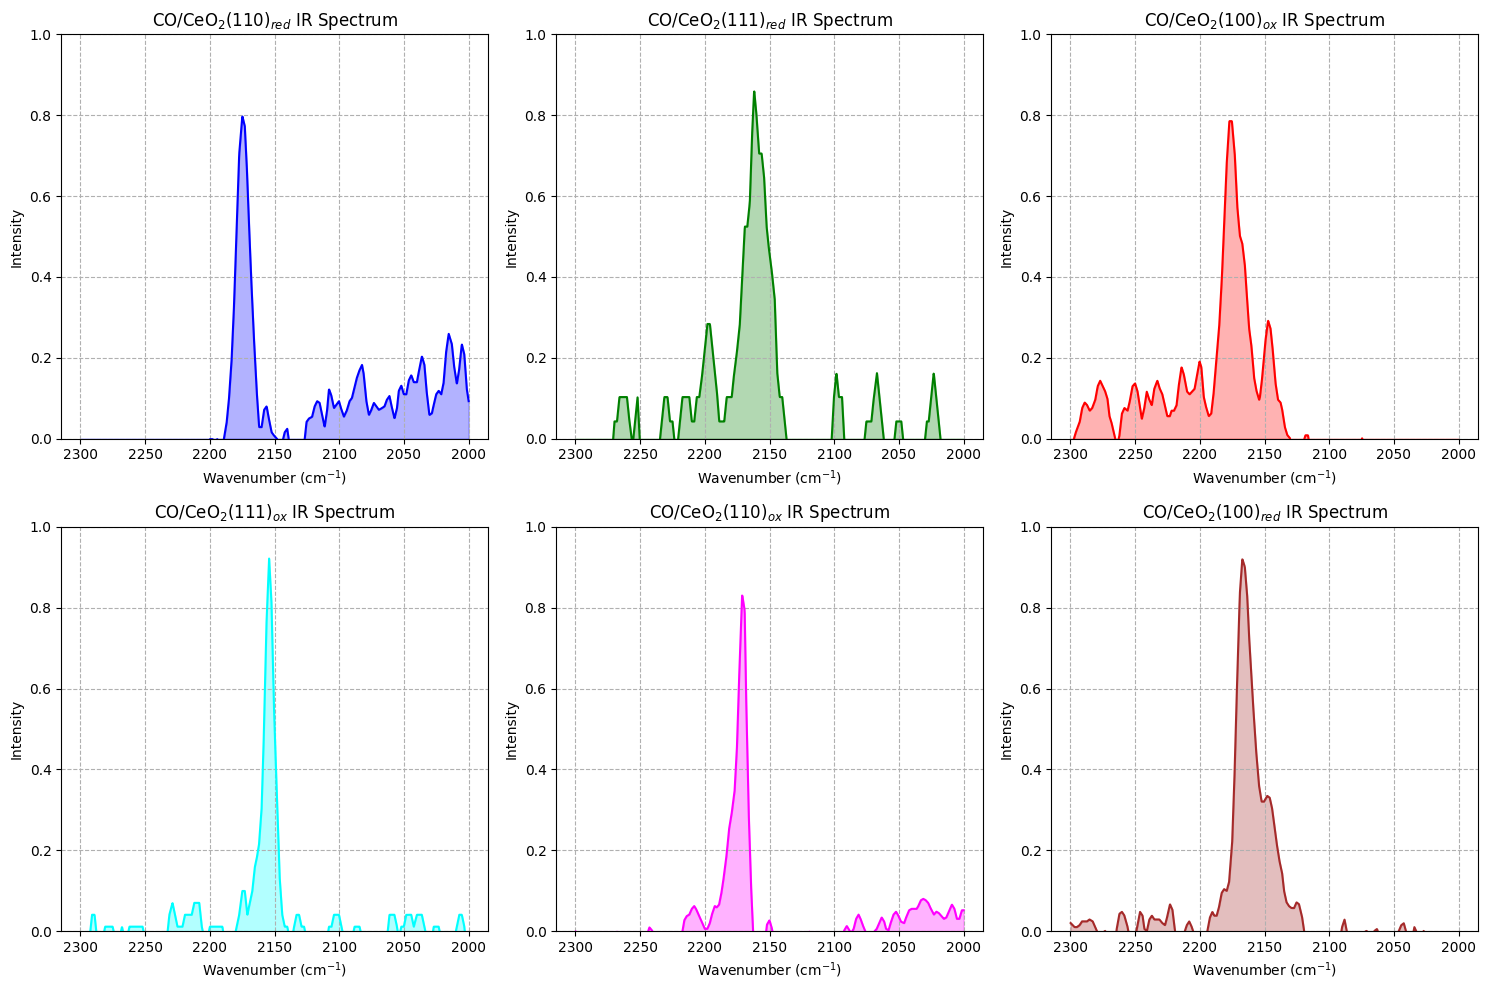

In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

# Folder containing CSV files
folder_path = '/content/drive/MyDrive/Research/Spectroscopy/IR_Spectrum_Predcition/ExperimentalData/'

# Define a list of colors to cycle through
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'brown']

# Prepare a 2x3 grid for six plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Iterate over each file in the folder
for index, filename in enumerate(os.listdir(folder_path)):
    if filename.endswith('.csv') and index < 6:  # Limit to the first six files
        file_path = os.path.join(folder_path, filename)
        data = pd.read_csv(file_path, header=None, names=["Wavenumber", "Absorbance"])
        file_name = os.path.splitext(os.path.basename(file_path))[0]  # Extracts the file name without extension

        # Extract xxx and yy from the file name
        if 'red' in file_name:
            xxx = file_name.replace('red', '')
            yy = 'red'
        elif 'ox' in file_name:
            xxx = file_name.replace('ox', '')
            yy = 'ox'
        else:
            xxx = 'unknown'
            yy = 'unknown'

        # Assuming spectrum_min and spectrum_max are defined earlier
        spectrum_min, spectrum_max = 2000.0, 2300.0

        data['Wavenumber'] = pd.to_numeric(data['Wavenumber'], errors='coerce')
        data['Absorbance'] = pd.to_numeric(data['Absorbance'], errors='coerce')

        # Filter data within the specified wavenumber range
        filtered_data = data[(data['Wavenumber'] >= spectrum_min) & (data['Wavenumber'] <= spectrum_max)].copy()
        filtered_data = filtered_data.dropna(subset=['Absorbance'])

        # Preprocess the filtered data
        filtered_data['Absorbance'] *= -1
        min_value = np.min(filtered_data['Absorbance'])
        max_value = np.max(filtered_data['Absorbance'])
        spectraData_normalized = (filtered_data['Absorbance'] - min_value) / (max_value - min_value)
        filtered_data['Absorbance'] = spectraData_normalized

        # Calculating background value and subtracting it using spectrum_min and spectrum_max
        background_data1 = filtered_data[(filtered_data['Wavenumber'] >= spectrum_min) & (filtered_data['Wavenumber'] <= 2140)]
        background_data2 = filtered_data[(filtered_data['Wavenumber'] >= 2200) & (filtered_data['Wavenumber'] <= spectrum_max)]

        background_value1 = background_data1['Absorbance'].mean()
        background_value2 = background_data2['Absorbance'].mean()

        # Using the average of these two values as the overall background value
        background_value = np.mean([background_value1, background_value2])

        filtered_data['Absorbance'] -= background_value

        # Prepare data for interpolation
        x = filtered_data['Wavenumber']
        y = filtered_data['Absorbance']

        # Normalize x-values for interpolation between 0 and 1
        x_normalized = (x - spectrum_min) / (spectrum_max - spectrum_min)

        # Create an interpolation function
        f = interp1d(x_normalized, y, kind='linear', fill_value="extrapolate")

        # Define the new x-range for interpolation
        new_x = np.linspace(0, 1, 1500)  # Adjust the number of points as needed

        # Compute the interpolated y-values
        interpolated_absorbance = f(new_x)

        # Access the correct subplot
        ax = axs[index // 3, index % 3]

        # Plot each spectrum in the correct subplot with a different color
        ax.plot(np.arange(2000, 2299.8, 0.2), interpolated_absorbance, color=colors[index % len(colors)])
        ax.fill_between(np.arange(2000, 2299.8, 0.2), interpolated_absorbance, color=colors[index % len(colors)], alpha=0.3)
        ax.set_title(f'CO/CeO$_{{2}}$({xxx})$_{{{yy}}}$ IR Spectrum', fontsize=12)
        ax.set_xlabel('Wavenumber (cm$^{-1}$)')
        ax.set_ylabel('Intensity')
        ax.invert_xaxis()
        ax.grid(True, which="both", ls="--")
        ax.set_ylim(0, 1)  # Set y-axis to [0, 1] to normalize intensity

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot with six subplots
plt.show()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
